# ON-ANALYTICS - BLOCK METRICS

- Last Update: 14/11/2023
- Blockchain: Ethereum
- API use: [Dune Analytics](https://dune.com/homehttps://dune.com/home)

----------------------------------------------------------

- Author: Oscar Q - Founder OnAnalytics
- [Linkedin](https://www.linkedin.com/in/oscarquirogap/). 
- [WebPage](http://onanalytics.co/)

## Introduction

Analyzing block metrics is essential for understanding the performance and health of a blockchain network. These metrics offer insights into transaction confirmation times, network security, scalability, and transaction fees. By monitoring block size, block time, confirmation times, and other relevant metrics, users, developers, and stakeholders can make informed decisions, optimize network efficiency, and ensure the secure and efficient operation of the blockchain.

In this notebook, we will describe key concepts and use the DUNE API to retrieve data related to fundamental metrics, such as block size and block time, the queries were made using the [Dune Analytics](https://dune.com/home) service. This provides an excellent way to familiarize yourself with a blockchain and start working with on-chain data. The data presented in this notebook can be found in many places, but we believe that learning by doing is an excellent way to begin, and putting things in context is important for analyzing data.

## Setting Up

**Installations**

In [250]:
# !pip install dune-client 
#Using the package manager (pip) Installing the python framework for interacting with Dune Analytics
# !pip install python-dotenv 
#Using the package manager (pip) Installing Python-dotenv. It reads key-value pairs from a .env file and can set them as environment variables
# !pip install matplotlib pandas

**Import Libraries**

In [186]:
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import dotenv, os, json
import dotenv
from dotenv import load_dotenv
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase
import requests

**Environment setup**

Creation of the .env file. By placing your API key in a .env file and loading it into your Python script, you can keep sensitive information separate from your code, which is a good practice for security and configuration management.

Remember that the .env file must be UTF8 without BOM
You can find information here: [.env sample](https://github.com/duneanalytics/dune-client/blob/main/.env.sample)

## Importing Data set from DUNE into a DATA_FRAME

**Getting the Last Update**

In [187]:
# If you need, change the current working directory where .env file lives.
## os.chdir("/Users/zokum/local-Workspace/python-notebook-examples")

In [188]:
# load .env file.  You should get true
dotenv.load_dotenv(".env")

True

In [189]:
# setup Dune Python client
dune = DuneClient.from_env()

## What is a Block?

A block is a collection of data, primarily related to a selection of organized transactions. Each time a block is added, new transactions are included, and additional information such as data about accounts, balances, and smart contracts is appended. This is when the current state of the blockchain, referred to as the "blockchain state," gets updated. 

In general, a block has a Header and a Body which in general contain this:

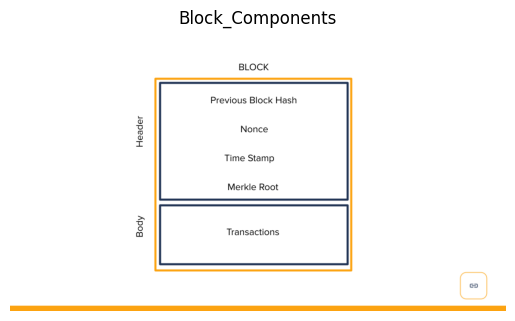

In [190]:
# Importing image
plt.title("Block_Components")
image = mpimg.imread("C:\\Users\\Oscar\\Documents\\Python\\Artículos\\Block.png")
# Aspect ratio of the image
aspect_ratio = image.shape[1] / image.shape[0]
# Set the aspect ratio of the plot to match the image
plt.gca().set_aspect(aspect_ratio)
# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks (optional)
plt.show()

## Usefull Metrics

### Genesis Block

The genesis block is the very first block in a blockchain. It serves as the foundation or starting point for the entire blockchain network.

In [245]:
#Wen can convert the result into a data frame with this line. 
query_result = pd.DataFrame(dune.get_latest_result(3159312, max_age_hours=8).result.rows)

In [246]:
query_result.head()

,genesis_block_date
0,2015-07-30


In [247]:
#This is optional.
est_credits = query_result.size/1_000
print(f" Estimated credit consumption from exporting this dataset is {est_credits:,.1f}")

 Estimated credit consumption from exporting this dataset is 0.0


### Block Height

The number of blocks in a blockchain, often referred to as the blockchain's "block height," indicates how many blocks have been added to the blockchain since its inception or the last reset. Each block in a blockchain typically contains a batch of transactions and references the previous block, forming a chronological and immutable chain of blocks. Some considerations:

- The number of blocks shows the progress of the blockchain, indicating how far it has advanced from its genesis block. Each new block adds to the chain, demonstrating the ongoing operation of the blockchain network.

- A higher number of blocks generally indicates a more secure and tamper-resistant blockchain. As more blocks are added, it becomes increasingly difficult to alter or manipulate transactions in earlier blocks, as doing so would require changing all subsequent blocks.

In [248]:
query_result = pd.DataFrame(dune.get_latest_result(3153786, max_age_hours=8).result.rows)
# can call get_latest_result_dataframe once newest version of Dune Client is released

In [249]:
query_result.head()

,number_of_blocks
0,18570987


### Block Time

The time elapsed between the creation of one block and another in a blockchain is known as "block time." Each block can be seen as a set of selected transactions, and this time interval determines how quickly new transactions are added to the blockchain.

Each blockchain adds blocks at different time intervals, and this time is determined by factors such as the design of the blockchain itself, consensus mechanisms, network objectives, and use cases. Network congestion, block size, and the number of participants also influence it.

To give you and example, for Bitcoin, the average time between blocks is approximately 10 minutes, indicating that a new group of transactions is added every 10 minutes. In the case of Ethereum, the time is divided into units called "slots," and under ideal conditions, a block is added every 12 seconds.  Let's make a query to get the average block time in a day for the last 30 days. 

In [228]:
#This is the query I used in Dune Analytics. 
query_result = pd.DataFrame(dune.get_latest_result(3162222, max_age_hours=8).result.rows)

In [229]:
query_result.head()

,average_block_time,dates
0,12.080548,2023-11-13 00:00:00.000 UTC
1,12.094078,2023-11-12 00:00:00.000 UTC
2,12.095771,2023-11-11 00:00:00.000 UTC
3,12.078859,2023-11-10 00:00:00.000 UTC
4,12.082238,2023-11-09 00:00:00.000 UTC


In [230]:
# Let`s convert the 'dates' column to a datetime data type with just the date portion
query_result['dates'] = pd.to_datetime(query_result['dates']).dt.date

# Create a new DataFrame with the converted dates. You can Copy the original DataFrame to preserve the original data. This step is not
# required but is good to know how to do it. 
new_query_results = query_result.copy()  

# Print the updated DataFrame
new_query_results.head()

,average_block_time,dates
0,12.080548,2023-11-13
1,12.094078,2023-11-12
2,12.095771,2023-11-11
3,12.078859,2023-11-10
4,12.082238,2023-11-09


This is the associated plot:

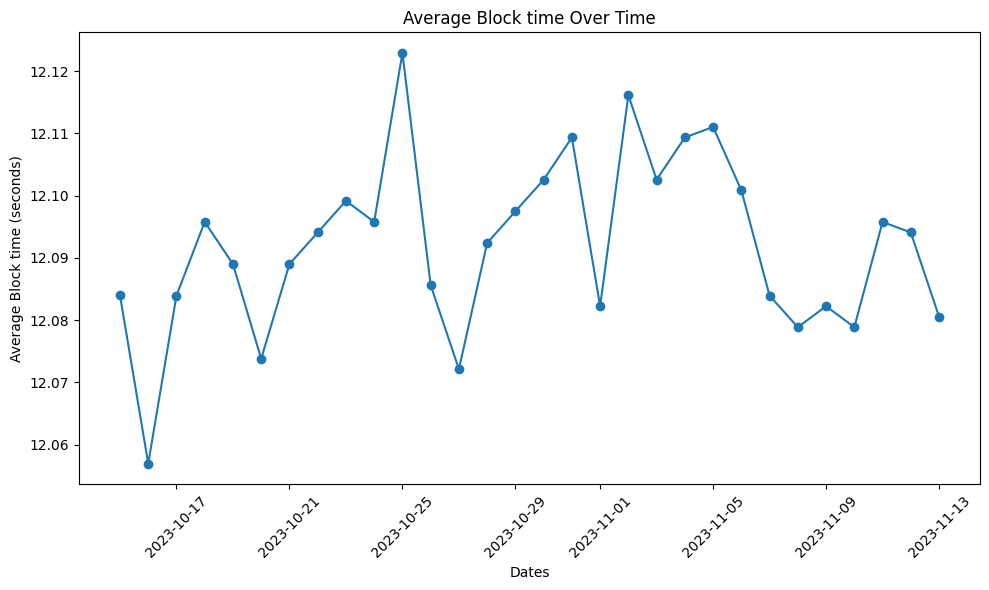

In [238]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(new_query_results['dates'], new_query_results['average_block_time'], marker='o', linestyle='-')

# Customize the plot (labels, titles, rotation, etc.)
plt.xlabel('Dates')
plt.ylabel('Average Block time (seconds)')
plt.title('Average Block time Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Ensures that the labels fit within the figure area
plt.show()

### Block Size

The size of a block, or "block size," refers to the amount of data stored in a block. This quantity is not unlimited and varies depending on the blockchain.  It is based on factors such as design and objectives, use cases, consensus algorithm, and desired scalability of the blockchain.

For blockchains like Bitcoin or Litecoin, the block size is given in bytes and determines how many transactions can be included in it; the larger a block is, the greater the number of transactions that can be processed.

For other blockchains like Ethereum, the block size limit is not determined directly by a fixed number of bytes but by the gas limit. Gas is the unit used to measure the computational resources consumed, so the size is determined by the given limit of computational resources. The following result shows us the average gas limit, average gas used and the resulting average size in bytes per day during the last 30 days. 

In [239]:
query_result = pd.DataFrame(dune.get_latest_result(3164271, max_age_hours=8).result.rows)

In [240]:
# Convert the 'dates' column to a datetime data type with just the date portion and the rest to integers.
query_result['dates'] = pd.to_datetime(query_result['dates']).dt.date
query_result['avg_gas_limit'] = query_result['avg_gas_limit'].astype(int)
query_result['avg_gas_used'] = query_result['avg_gas_used'].astype(int)
query_result['avg_size_bytes'] = query_result['avg_size_bytes'].astype(int)

In [241]:
query_result.head()

,avg_gas_limit,avg_gas_used,avg_size_bytes,dates
0,29999668,15080892,147011,2023-11-13
1,29999680,15102265,186807,2023-11-12
2,29999729,15105127,185329,2023-11-11
3,29999746,15094710,145591,2023-11-10
4,29999701,15094583,172209,2023-11-09


In [242]:
#Checking for data_types
query_result['avg_gas_limit'].dtype,query_result['avg_gas_used'].dtype,query_result['avg_size_bytes'].dtype

(dtype('int32'), dtype('int32'), dtype('int32'))

Let's plot the average gas limit and the average gas used:

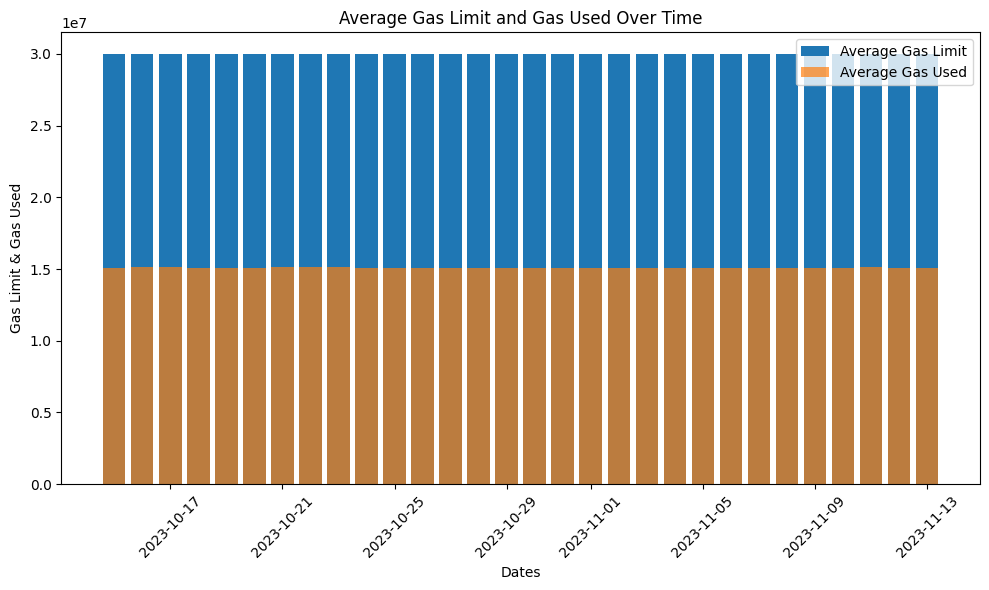

In [243]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(query_result['dates'], query_result['avg_gas_limit'], label='Average Gas Limit')
plt.bar(query_result['dates'], query_result['avg_gas_used'], label='Average Gas Used', alpha=0.7)  

# Customize the plot
plt.xlabel('Dates')
plt.ylabel('Gas Limit & Gas Used')
plt.title('Average Gas Limit and Gas Used Over Time')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

As you can see, the average is close to 30 million while the gas used is close to the target size which is 15 million.

For the Ethereum blockchain, the target size of a block is 15 million gas units, this means that is expected that the total sum of gas consumed by all the transactions included in the block will be 15 million. As shown in the results in the column "avg_gas_used" the result is close to this target. 

A block can have a size smaller or larger than the target, which depends on the demand for network usage, but it cannot exceed the established limit of 30 million units. If the block size is larger than the desired size, a mechanism will increase the minimum fee that must be paid per gas unit to ensure the transaction is included in the block. Similarly, if the block size is smaller than desired, the minimum fee will be decreased.

The gas limit is an important parameter to ensure the stability and security of the network. If a block grows indefinitely, nodes with lower performance will be unable to handle the transaction demand and process them in time before the next slot. Let's plot the average byte size of a block in a day. 

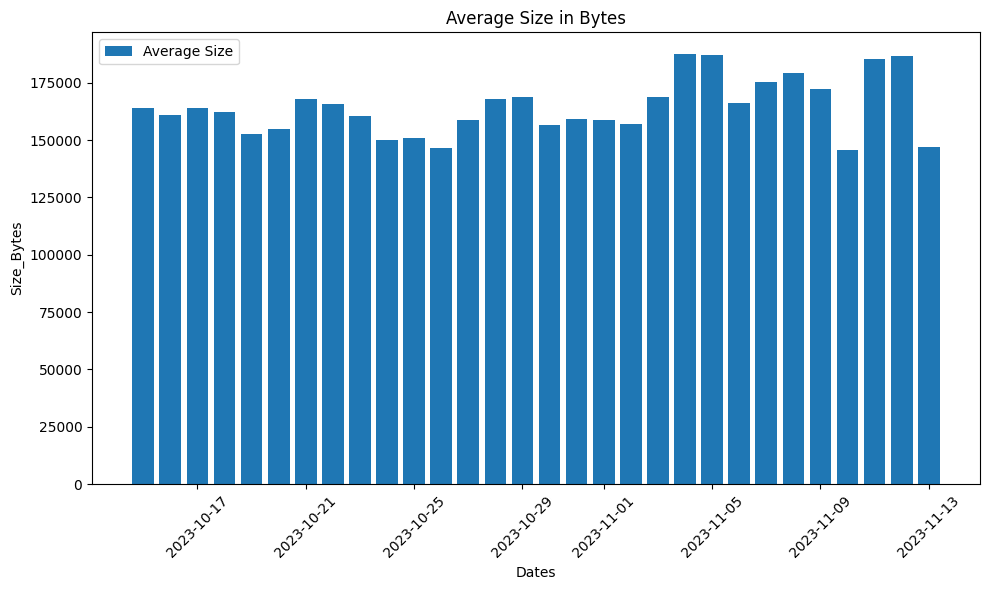

In [244]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(query_result['dates'], query_result['avg_size_bytes'], label='Average Size')

# Customize the plot
plt.xlabel('Dates')
plt.ylabel('Size_Bytes')
plt.title('Average Size in Bytes')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In the Ethereum Blockchain a regular transaction requires 21,000 gas units, while the execution of an operation in a smart contract can consume 100,000 or more gas units. You can find more information on this topic on [ethereum.org](https://ethereum.org/en/developers/docs/https://ethereum.org/en/developers/docs/)

In each transaction, the user must specify the gas limit they are willing to consume. This limit does not change the fact that, for example, a regular transaction requires a specific amount of gas to be executed. The user specifies the limit as a safeguard against contracts that might want to use an excessive amount of gas. 

If the limit is set below the gas cost of the transaction, the transaction will not be executed, and the gas fee cost will still be charged. For example, if my gas limit is 80,000 for a regular ETH transfer, 21,000 will be consumed, and the remaining will be refunded. However, if my limit is less than 21,000, for example, 20,000, the transaction will not be confirmed but the 20,000 will be consumed. 

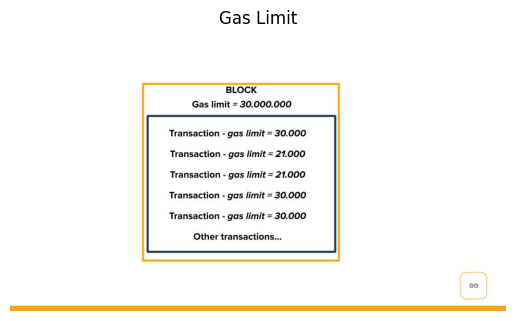

In [212]:
plt.title("Gas Limit")
image = mpimg.imread("C:\\Users\\Oscar\\Documents\\Python\\Artículos\\GasLimit.jpg")
aspect_ratio = image.shape[1] / image.shape[0]
plt.gca().set_aspect(aspect_ratio)
plt.imshow(image)
plt.axis('off') 
plt.show()

###  Base Fee Per Gas

This block's base fee was introduced by [EIP1559](https://eips.ethereum.org/EIPS/eip-1559)
The base fee is an essential component of Ethereum's gas fee structure. It is a part of the gas price that is automatically determined by the Ethereum network based on network demand. The base fee changes dynamically based on network congestion. When the network is congested, the base fee increases, and when it's less congested, the base fee decreases. The base fee is designed to maintain network stability and prevent spam transactions. You can find more information in the [Ethereum developer documentation](https://ethereum.org/en/developers/docs/gas/https://ethereum.org/en/developers/docs/gas/)

To be eligible for inclusion in a block, a user must pay at least the base fee. All base fees are burned and removed from circulation.

The following result shows us the block average base fee per gas in Gwei per day during the last 30 days. 

In [ ]:
query_result = pd.DataFrame(dune.get_latest_result(3168761, max_age_hours=8).result.rows)
# Convert the 'dates' column to a datetime data type with just the date portion
query_result['dates'] = pd.to_datetime(query_result['dates']).dt.date
# Print the updated DataFrame
query_result.head()

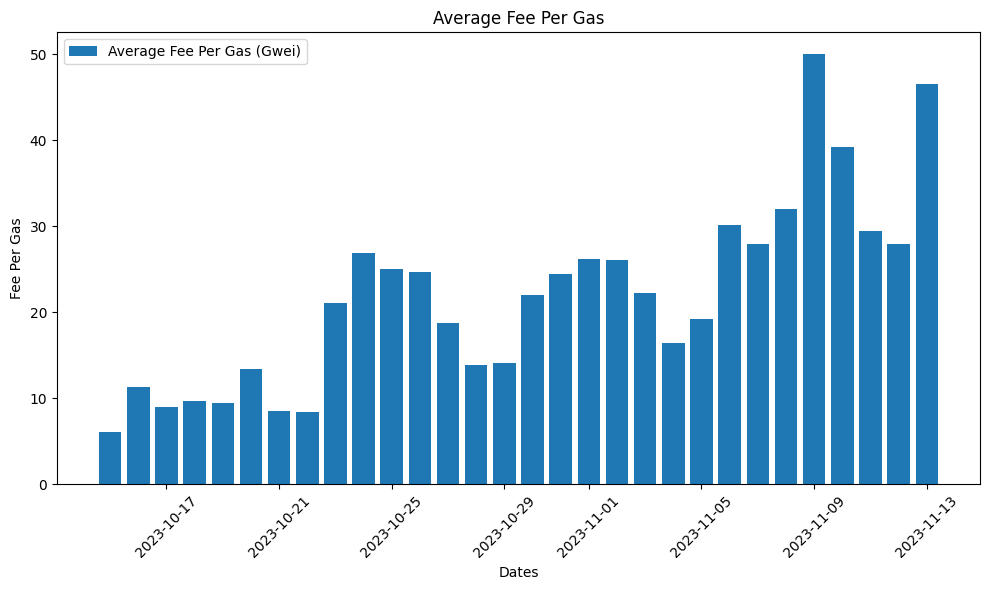

In [214]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(query_result['dates'], query_result['avg_base_fee_per_gas'], label='Average Fee Per Gas (Gwei)')

# Customize the plot
plt.xlabel('Dates')
plt.ylabel('Fee Per Gas')
plt.title('Average Fee Per Gas')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Transactions per Block

The number of transactions that in average a block includes. 

In [217]:
query_result = pd.DataFrame(dune.get_latest_result(3172985, max_age_hours=8).result.rows)
query_result['dates'] = pd.to_datetime(query_result['dates']).dt.date

In [218]:
query_result.head()

,dates,transaction_per_block
0,2023-11-13,152
1,2023-11-12,148
2,2023-11-11,155
3,2023-11-10,160
4,2023-11-09,157


This is the plot associated with the results in the table: 

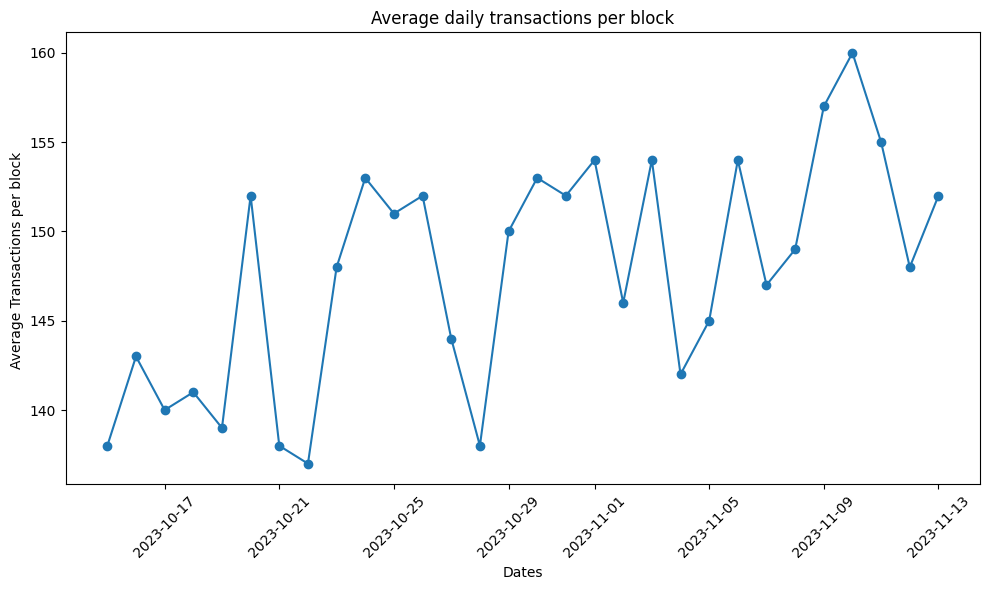

In [219]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(query_result['dates'], query_result['transaction_per_block'], marker='o', linestyle='-')

# Customize the plot (labels, titles, rotation, etc.)
plt.xlabel('Dates')
plt.ylabel('Average Transactions per block ')
plt.title('Average daily transactions per block')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Ensures that the labels fit within the figure area
plt.show()

## Conclusions

In this notebook, we check some basic block-related metrics:

- Genesis block.
- Block Height.
- Block Time.
- Block Size.
- Base fee per gas.
- Number of transactions per block.

I hope this notebook helps you get started in this exciting world of on-chain data. Enjoy!

## Contact

You can contact me in [linkedin](https://www.linkedin.com/in/oscarquirogap/). Check my webpage too for more information [WebPage](http://onanalytics.co/).